In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale
from numpy import random, float, array
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
data=pd.read_csv("crime.csv")

In [3]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
data.shape

(50, 5)

In [5]:
#Normalization function
def norm_func(i):
    x=(i-i.min())/(i.min())
    return(x)

In [6]:
#Normalized Data Frame
df_norm=norm_func(data.iloc[:,1:])
df_norm.describe()

,Murder,Assault,UrbanPop,Rape
count,50.000000,50.000000,50.000000,50.000000
mean,8.735000,2.794667,1.048125,1.908493
std,5.444387,1.851948,0.452336,1.283066
min,0.000000,0.000000,0.000000,0.000000
25%,4.093750,1.422222,0.703125,1.065068
50%,8.062500,2.533333,1.062500,1.753425
75%,13.062500,4.533333,1.429688,2.585616
max,20.750000,6.488889,1.843750,5.301370


In [7]:
from scipy.cluster.hierarchy import linkage
#Create dendrogram
import scipy.cluster.hierarchy as sch

In [8]:
z=linkage(df_norm,method="complete",metric="euclidean")

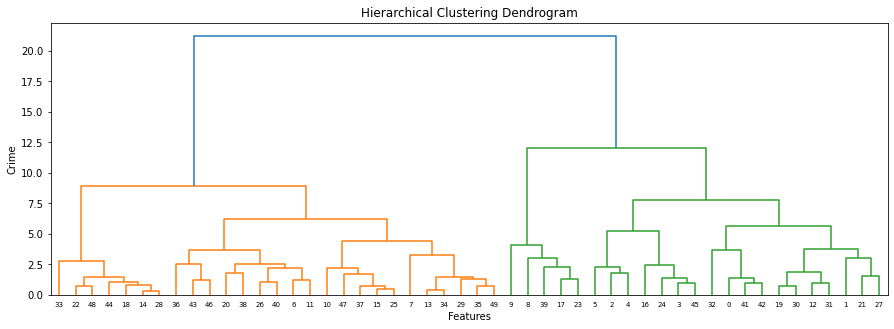

In [24]:
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Features')
plt.ylabel('Crime')
sch.dendrogram(z,leaf_rotation=0.,leaf_font_size=7,
)
plt.show()

In [10]:
data.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


In [11]:
#screw plot or elbow curve
k=list(range(2,15))

In [25]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pylab as plt
import numpy as np

In [13]:
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))

([<matplotlib.axis.XTick at 0x16a760a7fd0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

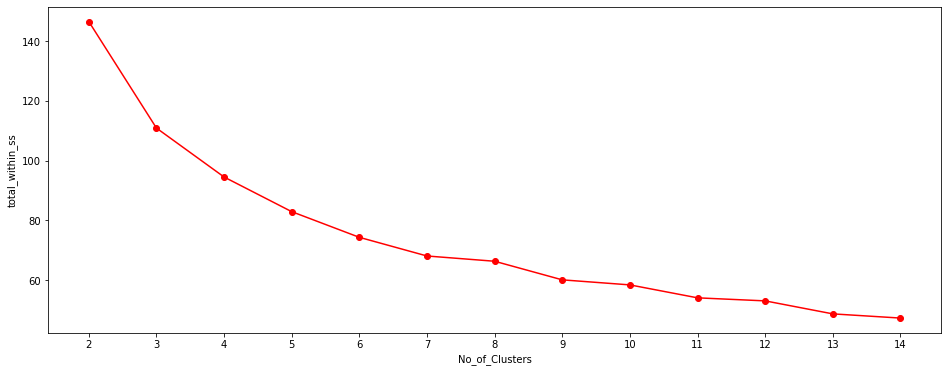

In [14]:
plt.figure(figsize=(16,6))
plt.plot(k,TWSS,'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_ss");plt.xticks(k)

## The elbow appear to be smoothening out after four clusters indicating that the optimal number of clusters is 4

In [15]:
#Selecting 4 clusters from the above scree plot which is the optimum number of cluters 
model=KMeans(n_clusters=4)
model.fit(df_norm)

KMeans(n_clusters=4)

In [16]:
KMeans(algorithm='auto',copy_x=True,init='k-means++',max_iter=300,n_clusters=4,n_init=10,n_jobs=None,precompute_distances='auto',random_state=None,tol=0.0001,verbose=0)

KMeans(n_clusters=4, n_jobs=None, precompute_distances='auto')

In [17]:
# Getting the labels of clusters assigned to each row
model.labels_

array([3, 1, 1, 1, 1, 1, 2, 0, 3, 3, 0, 2, 1, 0, 2, 0, 1, 3, 2, 1, 0, 1,
       2, 3, 1, 0, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 2, 3, 2, 3, 3, 2,
       2, 0, 2, 0, 2, 0])

In [18]:
model.cluster_centers_

array([[ 6.88392857,  1.95714286,  1.13616071,  1.52152642],
       [11.59615385,  4.31452991,  1.23557692,  3.31928346],
       [ 2.50892857,  1.01746032,  0.89732143,  0.80821918],
       [17.16666667,  4.66666667,  0.875     ,  2.18417047]])

In [19]:
import seaborn as sns

In [20]:
X=data[['Murder','Assault','Rape','UrbanPop']]
clusters=KMeans(4)     #4 clusters!
clusters.fit(X)
clusters.cluster_centers_
clusters.labels_

array([1, 1, 1, 3, 1, 3, 0, 1, 1, 3, 2, 0, 1, 0, 2, 0, 0, 1, 2, 1, 3, 1,
       2, 1, 3, 0, 0, 1, 2, 3, 1, 1, 1, 2, 0, 3, 3, 0, 3, 1, 2, 3, 3, 0,
       2, 3, 3, 2, 2, 3])

In [21]:
data['data_clusters']=clusters.labels_
data.head()
data.sort_values(by=['data_clusters'],ascending=True)
X.head()

,Murder,Assault,Rape,UrbanPop
0,13.2,236,21.2,58
1,10.0,263,44.5,48
2,8.1,294,31.0,80
3,8.8,190,19.5,50
4,9.0,276,40.6,91


In [22]:
stats=data.sort_values("Murder",ascending=True)
stats

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,data_clusters
33,North Dakota,0.8,45,44,7.3,2
28,New Hampshire,2.1,57,56,9.5,2
18,Maine,2.1,83,51,7.8,2
14,Iowa,2.2,56,57,11.3,2
44,Vermont,2.2,48,32,11.2,2
48,Wisconsin,2.6,53,66,10.8,2
11,Idaho,2.6,120,54,14.2,0
22,Minnesota,2.7,72,66,14.9,2
43,Utah,3.2,120,80,22.9,0
6,Connecticut,3.3,110,77,11.1,0


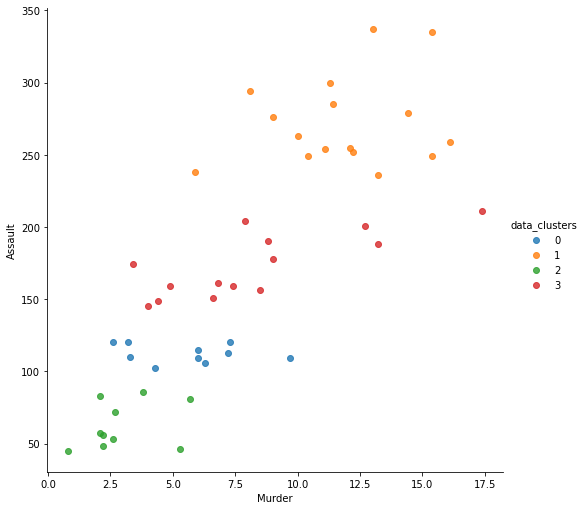

In [26]:
#Plot between pairs Murder~Assault
sns.lmplot('Murder','Assault',data=data,
          hue='data_clusters',
          fit_reg=False, size=7);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


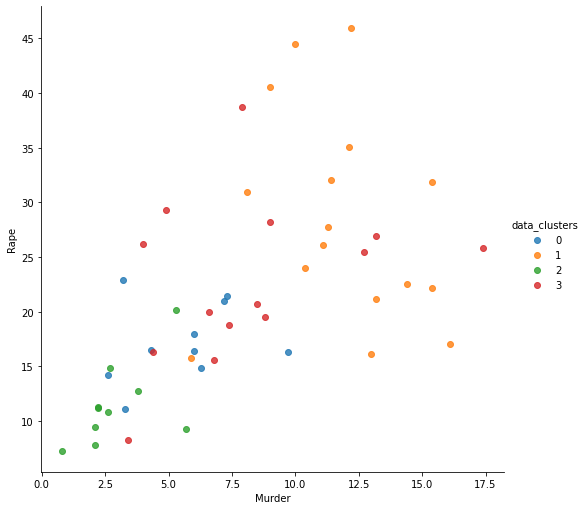

In [27]:
#Plot between  pairs Murder~Rape
sns.lmplot('Murder','Rape',data=data,
          hue='data_clusters',
          fit_reg=False,size=7);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


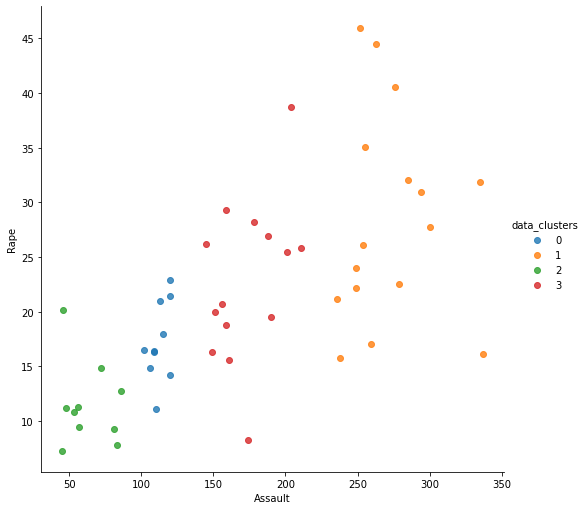

In [28]:
#plot between pairs Assault~Rape
sns.lmplot('Assault','Rape',data=data,
          hue='data_clusters',
          fit_reg=False, size=7);

## All dots are states of US and different colors are one cluster showing clustering for the crime data

In [29]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [36]:
df2=pd.get_dummies(data)
df2.head()

,Murder,Assault,UrbanPop,Rape,data_clusters,Unnamed: 0_Alabama,Unnamed: 0_Alaska,Unnamed: 0_Arizona,Unnamed: 0_Arkansas,Unnamed: 0_California,...,Unnamed: 0_South Dakota,Unnamed: 0_Tennessee,Unnamed: 0_Texas,Unnamed: 0_Utah,Unnamed: 0_Vermont,Unnamed: 0_Virginia,Unnamed: 0_Washington,Unnamed: 0_West Virginia,Unnamed: 0_Wisconsin,Unnamed: 0_Wyoming
0,13.2,236,58,21.2,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10.0,263,48,44.5,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8.1,294,80,31.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8.8,190,50,19.5,3,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,9.0,276,91,40.6,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [40]:
array=df2.values
array

array([[ 13.2, 236. ,  58. , ...,   0. ,   0. ,   0. ],
       [ 10. , 263. ,  48. , ...,   0. ,   0. ,   0. ],
       [  8.1, 294. ,  80. , ...,   0. ,   0. ,   0. ],
       ...,
       [  5.7,  81. ,  39. , ...,   1. ,   0. ,   0. ],
       [  2.6,  53. ,  66. , ...,   0. ,   1. ,   0. ],
       [  6.8, 161. ,  60. , ...,   0. ,   0. ,   1. ]])

In [42]:
stscaler=StandardScaler().fit(array)
X=stscaler.transform(array)
X

array([[ 1.25517927,  0.79078716, -0.52619514, ..., -0.14285714,
        -0.14285714, -0.14285714],
       [ 0.51301858,  1.11805959, -1.22406668, ..., -0.14285714,
        -0.14285714, -0.14285714],
       [ 0.07236067,  1.49381682,  1.00912225, ..., -0.14285714,
        -0.14285714, -0.14285714],
       ...,
       [-0.48425985, -1.08799901, -1.85215107, ...,  7.        ,
        -0.14285714, -0.14285714],
       [-1.20322802, -1.42739264,  0.03210209, ..., -0.14285714,
         7.        , -0.14285714],
       [-0.22914211, -0.11830292, -0.38662083, ..., -0.14285714,
        -0.14285714,  7.        ]])

In [44]:
dbscan=DBSCAN(eps=1,min_samples=10)
dbscan.fit(X)

DBSCAN(eps=1, min_samples=10)

In [46]:
#Noisy samples are given the label -1
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

In [48]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

,cluster
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,-1
7,-1
8,-1
9,-1


In [50]:
pd.concat([df2,cl],axis=1)

,Murder,Assault,UrbanPop,Rape,data_clusters,Unnamed: 0_Alabama,Unnamed: 0_Alaska,Unnamed: 0_Arizona,Unnamed: 0_Arkansas,Unnamed: 0_California,...,Unnamed: 0_Tennessee,Unnamed: 0_Texas,Unnamed: 0_Utah,Unnamed: 0_Vermont,Unnamed: 0_Virginia,Unnamed: 0_Washington,Unnamed: 0_West Virginia,Unnamed: 0_Wisconsin,Unnamed: 0_Wyoming,cluster
0,13.2,236,58,21.2,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
1,10.0,263,48,44.5,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
2,8.1,294,80,31.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,-1
3,8.8,190,50,19.5,3,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,-1
4,9.0,276,91,40.6,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,-1
5,7.9,204,78,38.7,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
6,3.3,110,77,11.1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
7,5.9,238,72,15.8,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
8,15.4,335,80,31.9,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
9,17.4,211,60,25.8,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
